## All numbers written are randomly selected unless explicitly mentioned

# Getting Started
Getting started with Keras is easy. This small tutorial will cover how to create your own model, as well as some notes and errors.
Keras has two Model architectures: Sequential & Functional API. Sequential will just append one layer to the next, while Functional API allows you to connect anything the way you want. Input to Keras layers are of n-1 dimension. If you have 450 files each containing 2 features, then the input dimension is 2-1 = 1. (In this case, input shape is 450, 2). Keras requires you to specify input and output dimensions, and they need to be a fixed size. For variable/dynamic sizes, use None as the dimension. Example:
```[ [1, 2, 3, 4] , [1, 4, 6, 9] ]``` is an array containing 2 arrays, each containing 4 numbers. Therefore, the shape of this array is (2, 4). The input to keras would be of shape (4), since it’s n-1 dimension. 

In [2]:
import numpy as np
np.array([[1, 2, 3, 4], [1, 4, 6, 9]]).shape

(2, 4)

```[ [1, 2, 3, 4], [1, 4] ]``` is an array containing 2 arrays of variable length. This will make the shape ```(2, None)```, since ```None``` indicates dynamic size. Therefore it’s now of dimension 1 of size None.

In [3]:
import numpy as np
np.array([ [1, 2, 3, 4], [1, 4] ]).shape

(2,)

Keras input/outputs are numpy arrays. Numpy is a library to extend the capabilities of arrays. Numpy allows you to perform tasks that aren’t possible with python lists (arrays), example:

```python
X = [ [1, 2], [3, 4], [5, 6] ]```

```X[0][0]``` will yield ‘1’. ```X[0:2]``` will yield ```X[0]```, ```X[1]```. ```X[0:3:2```] will yield ```X[0]```, ```X[2]```. Where ```X[a:b:c]``` are start, end, step size respectively.


In [33]:
X = [[1, 2], [3, 4], [5, 6]]
print("X[0] X[1] X[2] = ", X[0], X[1], X[2])
print("X[0][0] = ", X[0][0])
print("X[0:2] = ", X[:2])
print("X[0:3:2] = ", X[0:3:2])

X[0] X[1] X[2] =  [1, 2] [3, 4] [5, 6]
X[0][0] =  1
X[0:2] =  [[1, 2], [3, 4]]
X[0:3:2] =  [[1, 2], [5, 6]]


Numpy casting works as follows:
```python
X = numpy.array(X)```
Now you have access to:
```X.shape```, which will return the shape of the array.
```X[a, b, c]```, where a, b, and c are dimensions. Example: ```X[0, 0]``` is similar to ```X[0][0]```, but ```X[0:2, 0]``` means select the 0th element from ```X[0]``` and ```X[1]```. This will not work in a normal python list and will throw an error.


In [12]:
X = [[1, 2], [3, 4], [5, 6]]
X[0:2, 0]

TypeError: list indices must be integers or slices, not tuple

In [13]:
X = [[1, 2], [3, 4], [5, 6]]
X = np.array(X)
X[0:2, 0]

array([1, 3])

You can reshape numpy arrays as long as the size remains equal.
Example:
An array of shape (2, 4) can be reshape into (4, 2), (1, 8), (2, 2, 2), (8, 1), (1, 1, 1, 1, ……, 8).


In [15]:
x = np.array([[1, 2, 3, 4], [1, 4, 6, 9]])
print("Reshape", x.shape, "into")
print(x.reshape(4, 2).shape)
print(x.reshape(1, 8).shape)
print(x.reshape(2, 2, 2).shape)
print(x.reshape(8, 1).shape)
print(x.reshape(1, 1, 1, 1, 1, 1, 8).shape)

Reshape (2, 4) into
(4, 2)
(1, 8)
(2, 2, 2)
(8, 1)
(1, 1, 1, 1, 1, 1, 8)


To dynamically reshape, just replace (<b>at max</b>) one dimension with -1.

Example:
An array of shape (3, 8) can be reshaped into (-1, 4), which will make numpy autofill the dimension for you into (6, 4). 

In [18]:
x = np.array([[1, 2, 3, 4, 5, 6, 7, 8], [2, 4, 6, 8, 2, 4, 6, 8], [3, 5, 7, 9, 3, 5, 7, 9]])
print("Reshape", x.shape, "into")
print(x.reshape(-1, 4).shape)

Reshape (3, 8) into
(6, 4)


Keras uses numpy arrays, therefore everything possible with Numpy is possible with Keras. Note about numpy arrays: Shape of (n) is different than (n,). (n) is a 1D array, while (n, ) is a 2D array, where the 2nd dimension is understood as 1. However, for keras you need to reshape that array into (-1, 1) because keras assumes “,” as None.

In [30]:
x = []
x.append(1)
x.append(2)
x.append(3)
x = np.array(x)
print("Shape of x:", x.shape)
print("Contents of x", x)

x = x.reshape(-1, 1)
print("Reshape of x: ", x.shape)
print("Contents of reshape of x", x)

x = np.array([[1], [2], [3]])
print("Shape of x:", x.shape)
print("Contents of x", x)

Shape of x: (3,)
Contents of x [1 2 3]
Reshape of x:  (3, 1)
Contents of reshape of x [[1]
 [2]
 [3]]
Shape of x: (3, 1)
Contents of x [[1]
 [2]
 [3]]


## Keras Sequential Example

Only first layer in a Sequential model <b>must</b> take the input shape. The input dimensions are all documented on the Keras Website (just google Layer name + Keras). Every layer expects an ```input_shape``` parameter, except for Dense which expects ```input_dim``` since Dense layers expect only 1 dimension. You can still pass input_shape to a dense layer and it will work, since all parameters are interchangeable across keras.

In [32]:
from keras.models import Sequential
from keras.layers import Dense

#For demo only, meaningless values
n = 5
h = 10

model = Sequential()
model.add(Dense(n, input_dim = h))
# n is number of “units” to allocate for this layer. Selecting good parameters will be covered later.
model.summary() #See the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 55        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


After building a model, you need to compile it in order for the optimizer to be assigned to the model. Note that re-compiling a model will not erase the learnt weights, so it is safe to re-compile after fitting.

Before we continue let’s discuss some keywords that need to be known.
### Keywords
Any Machine Learning model consists of an <b>Input Layer</b>, <b>intermediate (hidden) layers</b>, and an <b>output layer</b>.

Keras support multi-input and multi-outputs via the <b>Functional API</b>.

A <b>loss function</b> is what determines how far the predicted answer is from the correct answer.

An <b>optimizer</b> is what changes the weights in the model to fix the errors (or wrong answers).

The <b>weights</b> are what the model uses to calculate the answer.

<b>Neurons</b> means units available at the layer. More neurons mean more weights, more calculations, more room for storing representations.

<b>Fitting</b> means Training.

<b>Learning Rate</b> is how often to adjust the weights.

One <b>epoch</b> is one iteration over the entire input.

<b>Batch size</b> means how many inputs should be taken at the same time (for parallel processing, doesn’t affect results). The higher the batch size, the less time it takes to train, but the loss will suffer a bit, causing you to need more epochs.<br>
Example: 5 epochs with batch size 32 is </b>almost</b> equal to 10 epochs with batch size 64, but not always. Best batch size is 32 for CPU, 128 for GPU.

An <b>activation function</b> is a function that formats the data into a range.
Example: The sigmoid function will format your data into a range between 0 to 1. So if your data was ranging from -7 to 17, then -7 becomes 0, 17 becomes 1, and everything else lies in between.

With this info in mind, let’s go back to compiling our model.

```python
model.compile(loss = LOSS_FUNCTION, optimizer = OPTIMIZER, metrics = [‘acc’])
```

the ```compile()``` function requires a loss, and an optimizer. We add the acc metric just to enable the printing of the accuracy.

There are multiple loss functions and optimizers available. For the sake of the tutorial, only the ```adam``` optimizer will be used, since it is used in almost every task. The loss function needs to be carefully selected, as not any function works with any model. The loss function should cater for your model. For classification problems, we often use `sigmoid`, `tanh`, or `softmax` (more on that later) activation functions. For regression problems, we use `mean_squared_error`, or `rmse` loss functions.

<b>Classification</b> is when you’re trying to map inputs into a set of outputs, such as classifying customers into VIP and Normal classes.

<b>Regression</b> is any problem where the output may be anything that cannot fit into classes (belongs to an infinite domain). Example: Calculating the time it takes to finish a task given the number of workers and their efficiency.

The activation functions are often utilized at the last layer in the model, aka the <b>output layer</b>. This is done to shape your output for classification or regression. For a regression problem, you would probably use `relu` function. `Relu` will simply convert anything below 0 to 0, and anything else remains the same. Example: `Relu(-1) = 0`, `Relu(7.3) = 7.3`. A `linear` activation function will not change your data. A `softmax` function works the same way a `sigmoid` function works, more on that later. `Tanh` will range your values from -1 to 1.

### Picking the right functions
The loss and activation functions work together to produce your output. Let’s say you have 2 classes only (binary problem). You would want the activation to be `softmax` and the loss to be `binary_crossentropy`, since softmax sets your data into 0 to 1, indicating a probability. If you have more than 2 classes, then the loss becomes `categorical_crossentropy`, since it's no longer a binary problem. You can use `categorical_crossentropy` on 2 classes but it will be meaningless. The difference between softmax and sigmoid is that `sigmoid` sets your values to 0~1 <b>per class</b>, while `softmax` will set them to 0~1 per the entire output. This means that a sigmoid function allows you to have a probability per class.

Example: The color of an apple can be either Green, Red, or Yellow but not more than one at the same time -> `softmax + categorical_crossnentropy`.

A news article can be talking about <b>technology</b> as well as <b>sports</b> at the same time, such as the VAR system implemented in the FIFA worldcup -> `sigmoid + binary_crossentrop`. We use `binary_crossentropy` because sigmoid is per-category, and each category can either be present or not present, therefore it’s a binary problem.

One last loss function that can be used is the `sparse_categorical_crossentropy`. The difference between it and the normal `categorical_crossentropy` is the shape of your output. If your output is a class ID, (0 to n), then you would use sparse_categorical_crossentropy (note that the first class must always start at 0, and there should not be a disconnection in the range from 0 to n). If your output is a class one-hot encoding (more on that later), then you would use `categorical_crossentropy`.

### One Hot Encoding
One-hot encoding is used to represent classes as present or non present, which is useful for multi-labeled classes, such as the news article above. Let’s say we have 3 classes: Sports, Technology, Politics. We represent the output as an array of 3 dimensions. We tag a ‘1’ where the category is present, and ‘0’ where it’s missing. So in our VAR example above, we would tag Sports and Technology, so our array would become `[1, 1, 0]`. In this case, we’re going to use `sigmoid + binary_crossentropy`. In the case of our Apple, if it was a Green apple, given the possibilities Red, Green, Yellow, then the array would be `[0, 1, 0]`. Since we can’t have more than one possibility, then it is `softmax + categorical_crossentropy`. When using `categorical_crossnetropy`, sigmoid and softmax will produce the same output.

In [41]:
#One Hot Encoding code
y_labels = [0, 1, 2, 3, 4, 0, 0, 2, 1]
y_encoded = []
max_y = max(y_labels)
for y in y_labels:
    encoded = [0]*(max_y+1)
    encoded[y] = 1
    y_encoded.append(encoded)
y_encoded

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0]]

### Keras Layers

#### Dense
A Dense Layer means that all inputs are connected to all units in the layer. This is a big aid in how to select the number of units (Neurons). For example, if I’m training a model to do multiplication, then my inputs are A, B (in `A * B = C`). Therefore it is best to have a Dense layer with 2 units
```python
(Dense(2, input_dim = 2))```
It is possible to have more neurons, but it will introduce complexity. It is also possible to have less neurons, which will introduce compression.
#### RNN
An RNN layer is connected in a feed-forward fashion, as in the output of the current unit (not layer) is passed to the next unit. This gives us the concept of time-based mechanism. For example, a traffic light works by turning from Green to Orange, then from Orange to Red. This helps us understand that the traffic light is Turning Off. In order to understand that, we had to look at the sequence of lights, not at all lights at the same time. This is exactly how an RNN layer works. For this particular example, we need 3 units (they’re called <i>Cells</i> in RNN). The first unit gets the first light color, which is green, and then passes it into the next unit. The 2nd unit now knows that it was green, and gets Orange from the input. The 2nd unit then passes Orange to the next unit, and the 3rd unit accepts Red from the inputs. Since this is the last unit, this is the output is what we usually require, which is what it passes to the next cell. The output that is passed from one cell to another is called the <b>hidden state</b>. The output that each unit produces is different than the hidden state, and is the prediction. For example, let’s take the example of an incremental counter. We have the numbers 1, 2, 3....etc. Let’s map down the input to the unit, the hidden state, and the output.

| Unit |              Hidden State              | Input | Output |
|------|:--------------------------------------:|:-----:|:------:|
| 1    | There isn't a previous unit |   1   |    2   |
| 2    |                    1                   |   2   |    3   |
| 3    |                    2                   |   3   |    4   |

Therefore in this case, we needed to obtain the output only at the last unit to predict the next sequence. There are two ways to do this:

A.	Extract the output from unit 3<br>
B.	Attach a Dense layer of size 1 (1 units) after the RNN layer.

Usually we’d prefer the “B” approach, but the “A” approach is necessary in Transformers and Encoders. More on them later as they’re a separate study.
One thing to note is that the Hidden state doesn’t carry the input of the previous state in the form you see in the table, this is there for demonstrative purposes only. Usually the hidden state is a value that shows what the unit understood from the input, and sends it to the next unit to help it remember what it has.


### RNN-like layers
RNN has 2 other variations. GRU and LSTM. As you noticed, Unit 3 has no connection to Unit 1, therefore it is impossible for it to know the hidden state of unit 1. So if we have the sequence: 1, 2, 3, unit 3 will predict 4. If we have the sequence 4, 2, 3, unit 3 will still predict 4 since it has seen “2” before “3”. This problem is called the <b>Vanishing Gradient Problem</b>. GRU and LSTM were introduced to help the RNN layer remember previous units, only to an extent. As I mentioned earlier, the hidden layer is simply a representation, this means it has a fixed size, and cannot carry too much information, therefore information is bound to be lost. It is almost impossible, for example, to store 10000000 values in such a tiny space. A solution to this problem will be explained in the Encoder part.<br>
The difference between GRU and LSTM is the number of internal parameters, as GRU has a gate to either “remember” or “forget” the previous hidden state, while LSTM has 2 separate gates to remember and “reset”. GRU and LSTM work in the same way an RNN works. Because of the introduced “memory” in LSTM, people often refer to the output of the last unit as the <b>context vector</b>, as seen below.
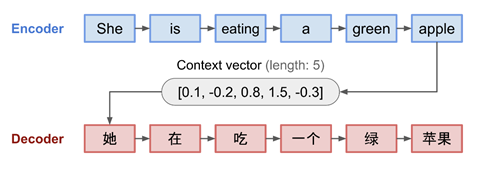

### Keras example of LSTM
Assume we have the following dataset:
```python
Input = [
[1, 2, 3], [4, 5, 6], [2, 4, 6], [4, 8, 12]
]
Output = [
[4], [7], [8], [16]
]
```
Input shape is `(4, 3)`, Output shape is `(4, 1)`<br>
The input to an RNN layer is of dimensions `(batch_size, time_steps, features)`, which here maps to `(4, 3, 1)` in our case. We added the 1 since LSTM requires a 3D dimension ([lookup the RNN documentation by Keras](https://keras.io/layers/recurrent/)). `time_steps` refers to the number of changes per feature. In our Traffic Light example, we had 1 feature (color) across 3 time steps.<br>
The model becomes

In [50]:
from keras.layers import LSTM
n = 1 # Since we have 1 feature
model = Sequential()
model.add(LSTM(n, input_shape = (3, 1))) #From(4, 3, 1) we need to remove first dimension
model.compile(loss='mean_squared_error', optimizer = 'adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


Now since we added the “1” to out Input dimension, if we want to perform `model.fit` (to train the model) we will run into an error that the dimensions are wrong, therefore we need to reshape the input `(.reshape(-1, 3, 1))`. <br>
An alternate solution would be to add a Dense(1) layer after the LSTM layer, but isn’t necessary in this point. 
```python
...
model.add(LSTM(...))
model.add(Dense(1))
...
```

Adding 2 RNN layers after each other requires a special parameter `return_sequences = True`, else you will face an error. 
Example:
```python
model.add(LSTM(128, return_sequences = True))
model.add(LSTM(64))
```
What this does is that it returns the output per input it receives, instead of just the last output. If you want to add a Dense layer after that, you would require a `TimeDistribution` **Wrapper**. Wrapper layers will be explained after **CNN**.

There are other parameters that you can use for LSTM, such as `return_states = True`, which returns the hidden states. This is useful if you want to start the next layer from the output of the first layer, so you can simulate a next connection (instead of 2 layers with 3 cells, it works as if it’s 1 layer with 6 cells). Of course, layers 1 & 2 will have different weights.<br>
The last parameter that I’ll discuss is the `unroll` parameter. Unroll is meant to be used for parallelism whether you’re utilizing a GPU or a multi-core CPU. Let’s assume we have this code:
```python
for X in range(3):
    Function(X)
```
Unrolling it means splitting the function calls. In this case it’ll become:
```python
Function(0); Function(1); Function(2)
```
Each core will now execute one of the functions.
__*Note that Unroll will not work if the input is 1.*__


## CNN

CNN layers, or `Conv1D` & `Conv2D` are Convolutional Layers that extract features from a set, generating a subset, then you can extract features from the subset, ...etc. Useful for spatial data, like images or frequences. Think of a human face. The first feature you’ll extract for example is the skin color, and the eyes, nose, ...etc. The 2nd feature set would be eyelashes, pupil, pupil color. The 3rd feature set would be the iris, the retina...etc. As you noticed, smaller features are obtained at every iteration, this means that we can achieve compression.
Other layers related to CNN are pooling layers. Pooling here means selecting a number that represents a window. There are 3 types of poolings (that I know of), Max, Min, and Avg. I will solve for Max Pooling and you figure out the rest. Let’s assume we have the following 4x4 matrix with pooling of size 2x2. Max pooling will select the Max of the 2x2 window for each window.
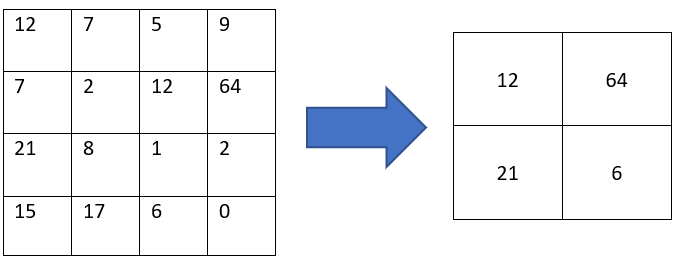

Min/Avg pooling do just as the name specifies.

As you noticed, the result of the pooling layer is of a different dimension. This helps in reducing the features. Pooling is used to select the highly important details. Example: In a picture that has a white background, and a black smiley face is drawn, the difference between black and white in terms of value is 255 (white is 255, black is 0). So if you apply Min Pooling on the image, you’re going to favor the black pixels over the white pixels since they have a lower value, which is exactly what we need.
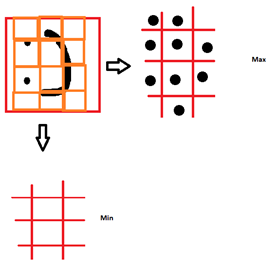

Other than pooling, we have Global Pooling, which is a bigger window size. Global Max Pooling will select (by default) the Max value in the entire nxn array. This is useful when you want to select one feature per channel (nxn window) instead of multiple features.

### Keras examples on CNN
CNN accepts input of shape `(dimension, channels)` for Conv1D, or `(width, height, channels)` for Conv2D. If you use `data_format = "channels_first"` then channels is shifted to the beginning of the shape.


In [149]:
from keras.layers import Conv1D

#For demo Only
dimension = 28
channels = 3
#

model = Sequential()
model.add(Conv1D(12, (3), input_shape = (dimension, channels))) #12, 3 are examples. It can be any number.
model.add(Conv1D(32, (3)))
model.add(MaxPooling1D())
model.add(Flatten()) #Needed to convert the dimensions to 1D down from 2D
model.add(Dense(10))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 26, 12)            120       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 24, 32)            1184      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 10)                3850      
Total params: 5,154
Trainable params: 5,154
Non-trainable params: 0
_________________________________________________________________


An alternate for MaxPooling would be GlobalMaxPooling1D(), but in this case you won’t need to Flatten().

In [55]:
from keras.layers import Conv1D

#For demo Only
dimension = 28
channels = 3
#

model = Sequential()
model.add(Conv1D(12, (3), input_shape = (dimension, channels)))
model.add(Conv1D(32, (3)))
model.add(GlobalMaxPooling1D())
model.add(Dense(10))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 26, 12)            120       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 24, 32)            1184      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 1,634
Trainable params: 1,634
Non-trainable params: 0
_________________________________________________________________


You might get an error sometimes about the shape being Negative. This is because in the code
```python
Conv1D(12, (3))
```
there will be a reduction in the dimension by n-1, where n is the kernel size. Here our kernel is of size 3. If you look at the first layer in the summary above, Our shape goes from `(None, 26, 12)` to `(None, 24, 32)`, if the shape reaches 0 or below then you'll get that error.

In [60]:
from keras.layers import Conv1D

#For demo Only
dimension = 4
channels = 3
#
try:
    model = Sequential()
    model.add(Conv1D(12, (3), input_shape = (dimension, channels)))
    model.add(Conv1D(32, (3)))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(10))
    model.summary()
except Exception as e:
    print("Error Details:", e)


Error Details: Negative dimension size caused by subtracting 3 from 2 for 'conv1d_14/convolution/Conv2D' (op: 'Conv2D') with input shapes: [?,1,2,12], [1,3,12,32].


Conv2D works similarly but you just need to change 1D to 2D, and change the input shape.<br>
Note on CNNs: CNN will try to understand the data and adapt for errors better than other models. Example: If you’re teaching a model to predict Multiple Labels but it is learning from only ONE label, then CNN will be able to produce multi-labels on its own, where RNN/Dense will not.<br>
Example:<br>
+ Training:<br>
 + “Messi scored a Goal” -> Sports<br>
 + “Donald Trump proposed a new Law” -> Politics<br>

+ Testing:<br>
 + “Messi proposed a new Law”<br>


* RNN result -> Politics<br>
* CNN Result -> Sports AND Politics


## Wrapper Layers

There exists Wrapper layers that are supposed to reshape the data or perform under-the-hood computation for often required tasks. As an example, we know that RNN layers take input and feed it to the next cell. RNN is uni-directional, as it goes from current cell to the next. However it is possible to move in reverse order by using the parameter `go_backwards=True`. This will cause the RNN to be uni-directional but in the opposite direction. What if we would like to combine the two results together? We would need 2 RNN layers, each working in a direction, and connected to the same input. Then we need to add them up together (concatenate). Our code will look as follows, and is only possible using the Functional API:
```python
Input = …
LSTM_1 = LSTM(128)(Input)
LSTM_2 = LSTM(128, go_backwards = True)(Input)
Merged = concat([LSTM_1, LSTM_2], axis = 1) #Merge them into the same dimension
```
Instead of having to write this everytime, we can use Bidirectional Wrapper instead, and it’ll also allow us to remain using the Sequential model.
```python
Model = Sequential()
Model.add(Bidirectional(LSTM(128), input_shape = (…))
```
1 Layer was enough to substitute for 4 layers.


### TimeDistributed
Another wrapper exists which is called Time Distributed. It is often used with Dense Layers connected to an LSTM layer. As discussed before, Dense layers are connected in an all-to-all fashion, as in every unit is connected to every cell. However, what if we wanted to connect every unit to its respective cell only? We’ll use Time Distributed on the Dense layer, and we will return sequences of LSTM. This figure shows what it looks like.

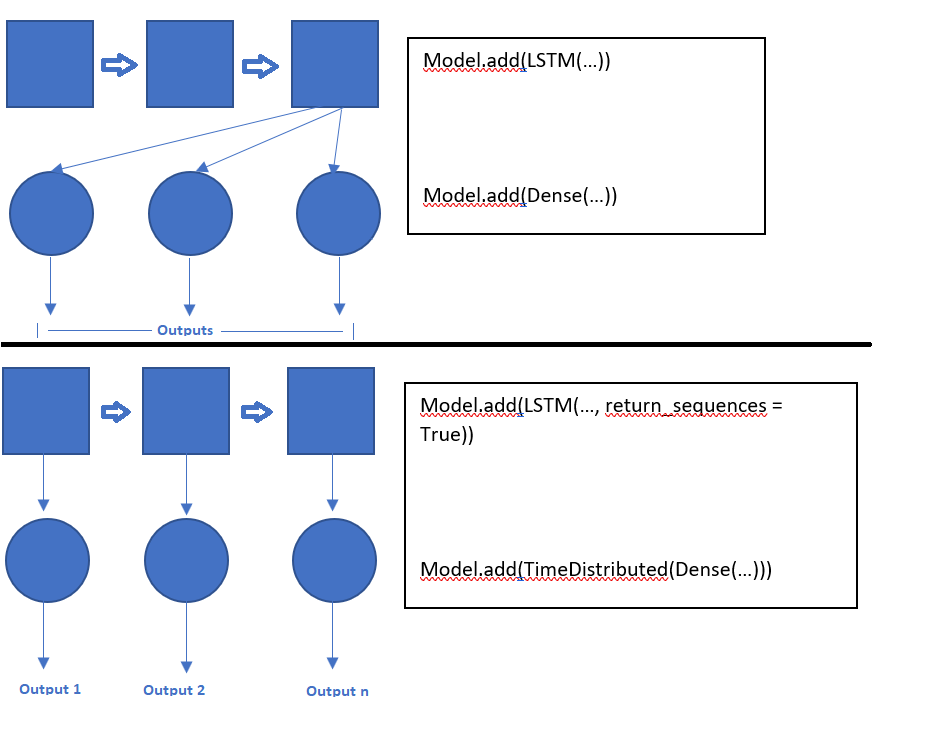

Note that when `return_sequences = True`, each dense unit will have its own output. `TimeDistributed` is there so that each dense unit takes input from one cell. If `TimeDistributed` wasn’t written, then each dense unit will take the input from every LSTM cell.


What if you wanted to get the output of the last cell as an input to every Dense unit, but you wanted to get the output from every unit?

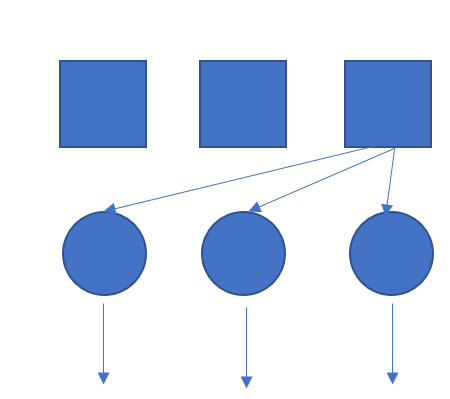

`TimeDistributed` requires `return_sequences = True`, but here we have only 1 sequence being returned, which is the last sequence. This will leave us with dense units that have no input. The solution is to use the `RepeatVector` layer. Basically all this layer does is repeat a sequence `n` times. In our case here we need to repeat it 3 times since we have 3 Output. The code becomes:

In [68]:
from keras.layers import RepeatVector, TimeDistributed
Model = Sequential()
Model.add(LSTM(128, input_shape = (15, 15))) #Any Number Works
Model.add(RepeatVector(3))
Model.add(TimeDistributed(Dense(5))) #Any Number works
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128)               73728     
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 3, 128)            0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 3, 5)              645       
Total params: 74,373
Trainable params: 74,373
Non-trainable params: 0
_________________________________________________________________


**It is possible to use any number other than 5. In keras, 5 here refers to the output shape and not the number of units. Although the name specifies units and cells, but eventually the units and cells are automated.**

## Keras Functional API

As discussed (and seen) before, Functional API gives you more freedom and flexibility in creating your model. As a starter, I’m going to create a sequential model then convert it to functional just so you grasp the concept.

In [70]:
Model = Sequential()
Model.add(Dense(128, input_dim = 128))
Model.add(Dense(64))
Model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
Total params: 24,768
Trainable params: 24,768
Non-trainable params: 0
_________________________________________________________________


The Functional equivalent of this model is:

In [71]:
from keras.models import Model
from keras.layers import Input

Input_layer = Input(shape=(128, )) #It is required to add a coma in this case else Keras might throw an error.
Dense_layer = Dense(128)(Input_layer)
Dense_layer2 = Dense(64)(Dense_layer)
model = Model(inputs = [Input_layer], outputs = [Dense_layer2])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
Total params: 24,768
Trainable params: 24,768
Non-trainable params: 0
_________________________________________________________________


In the Sequential API, we would create a layer and `.add` on top of it. While in the Functional API we would connect the layers however we want. 
The variables here are called **Symbolic Tensors**, as they aren’t a reference to the layer itself, they’re a reference to the connection. For example:
```python
Dense_layer = Dense(128)(Input_layer)
```
doesn’t refer to the Dense layer, it refers to the connection between the Dense Layer and the Input. This allows you to connect the same layer to multiple previous layers. For example this is possible:
```python
Dense_layer2 = Dense(64) #Note that we didn’t connect it to (Dense_layer)
Dense2_connection1 = Dense_layer2(Input_layer)
Dense2_connection2 = Dense_layer2(Dense_layer)
```
It is only possible to connect symbolic links together, as in it is **not** possible to do the following
```python
Dense_layer3 = Dense(32)(Dense_layer2)
```
This will throw an error because Dense_layer2 is a layer and not a connection, so you will need to connect it instead to `_connection1` or `_connection2`. 
```python
Dense_layer3 = Dense(32)(Dense2_connection1)
```
It is possible to connect it to both layers using the same process, but it is eventually you will have to concatenate the links together as follows.
```python
Concat_dense = concatenate([Dense2_connection1, Dense2_connection2])
```
Concat is one of the special layers that can be connected to even though they’re not links. Now it is possible to do:
```python
Dense_layer3 = Dense(32)(concat_dense)
```
**Note: Concatenate and concatenate aren’t the same layers. Small letter layers are the functional API implementation, while Capital letter layers are for Sequential use only. Example: Merge and merge. Add and add. Multiply and multiply ..etc. These layers are special layers as discussed before.**


In [75]:
from keras.models import Model
from keras.layers import Dense, concatenate
input_layer = Input(shape = (128,))
Dense_layer = Dense(128)(input_layer)
Dense_layer2 = Dense(64) #Note that we didn’t connect it to (Dense_layer)
Dense2_connection1 = Dense_layer2(input_layer)
Dense2_connection2 = Dense_layer2(Dense_layer)
concat_dense = concatenate([Dense2_connection1, Dense2_connection2])
Dense_layer3 = Dense(32)(concat_dense)
model = Model(inputs = [input_layer], outputs = [Dense_layer3])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 128)          0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 128)          16512       input_5[0][0]                    
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 64)           8256        input_5[0][0]                    
                                                                 dense_21[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 128)          0           dense_22[0][0]                   
          

## Custom Layers - The Lambda Layer

It is possible to create your own layers in keras, but it is fairly complicated and I haven’t obtained the necessary knowledge to do that yet. However, there is a shortcut that you can do.

Let’s assume you want to create a layer that simple Transposes the input from the previous layer. For this, we’re going to utilize the lambda layer. But before that, we need to explain the Python Lambda function.

### Python Lambda
Assume we have the following function:
```python
def function(x):
    return x-1;
```
we can substitute the entire function by a lambda function as follows:
```python
lambda x: x-1
```
this is useful for creating functions quickly instead of having to define one. Lambda can be used when the input is passed. <br>Example:


In [76]:
add = lambda x, y : x + y 
print(add(2, 3))

5


Keras lambda layers execute user-defined functions. But if it’s a small function then it is better to use lambda instead. Here is the implementation of the Transpose function.
```python
Lambda_layer = Lambda(lambda x: tf.transpose(x), lambda x: (None, x[2], x[1]))(previous_layer)
```
Now I’ll explain step by step what happens here.
First of all we are connecting the lambda layer to the previous layer. As you know Functions are called by using the parenthesis `()`, so technically we’re calling `previous_layer`. Since `previous_layer` is a parameter now, `lambda x` will take `previous_layer` as its x. So it becomes the equivalent of
```python
lambda previous_layer: previous_layer.T
```
`tf.transpose` is a **tensorflow** function that does Transpose. **All Keras values are tensor values, and most of the time numpy operations are possible. Keras is built on-top of Tensorflow.**

Now the 2nd parameter of the Lambda <b>Layer</b> is the output shape. So in `lambda x`, `x` becomes the shape of `previous_layer`. If the shape was `(200, 400)`, then the shape transposed is `(400, 200)`, therefore the new shape is `(None, 2nd dimension, 1st dimension)`, hence the usage of `(x[0], x[2], x[1])`.<br>

In [99]:
import tensorflow as tf
inp = Input(shape = (200, 400))
transpose_layer = Lambda(lambda x: tf.transpose(x), lambda x: (x[0], x[2], x[1]))(inp)
model = Model(inputs = [inp], outputs = [transpose_layer])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 200, 400)          0         
_________________________________________________________________
lambda_22 (Lambda)           (None, 400, 200)          0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


There are multiple layers that are there just for the sake of simplicity, such as `Extract`, which simply takes only the last output. There’s also `Reshape`, which allows you to simply reshape the arrays.
It is also possible, since keras values are numpy, to select specific values manually. For example, you can connect a Dense layer to the LSTM layer’s last cell manually:
```python
Lstm_layer = LSTM(128, return_sequences = True)(input_layer)
lambda_layer = Lambda(lambda x: x[:, -1, :])(lstm) #x[:, -1, :] means from every sample, go to the last output, and take the entire vector
Dense(128)(lambda_layer) #Dense layer is connected to only the last cell’s output.
```
It is also possible to take only 1 value from every LSTM cell, but it has no use whatsoever
```python
lambda_layer = Lambda(lambda x: x[:, :, 0])(lstm)
```


In [148]:
inp = Input(shape=(200, 400))
lstm = LSTM(128, return_sequences=True)(inp)
_1_from_every_cell = Lambda(lambda x: x[:, :, 0], name = "1_from_every_cell")(lstm)
_context_vector_only = Lambda(lambda x: x[:, -1, :], name = "last_cell_only")(lstm)
dense = Dense(16)(_1_from_every_cell)
dense2 = Dense(16)(_context_vector_only)
model = Model(inputs = [inp], outputs = [dense, dense2])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_76 (InputLayer)           (None, 200, 400)     0                                            
__________________________________________________________________________________________________
lstm_56 (LSTM)                  (None, 200, 128)     270848      input_76[0][0]                   
__________________________________________________________________________________________________
1_from_every_cell (Lambda)      (None, 200)          0           lstm_56[0][0]                    
__________________________________________________________________________________________________
last_cell_only (Lambda)         (None, 128)          0           lstm_56[0][0]                    
__________________________________________________________________________________________________
dense_62 (

## Axis

It is important to be able to tell different axis apart. Axis are simply the dimension. Axis are used to select specific dimensions when it is possible for multipl dimensions to be true. <br>Example: Say you want to concatenate 2 arrays into one. Would you like the new shape to be `(1, 2n)`, or `(2, n)`, where n is the vector length?
Let's do that using numpy arrays:

In [158]:
import numpy as np
array1 = np.array([1, 2, 3]).reshape(1, -1) #n is 3 in this case
array2 = np.array([4, 5, 6]).reshape(1, -1)
print("Array 1 Shape:", array1.shape)
print("Array 2 Shape:", array2.shape)
print()
array3 = np.concatenate([array1, array2], axis = 0)
print("Axis 0: Shape:", array3.shape)
print(array3)
print()
array3 = np.concatenate([array1, array2], axis = 1)
print("Axis 1: Shape:", array3.shape)
print(array3)

Array 1 Shape: (1, 3)
Array 2 Shape: (1, 3)

Axis 0: Shape: (2, 3)
[[1 2 3]
 [4 5 6]]

Axis 1: Shape: (1, 6)
[[1 2 3 4 5 6]]


Since everything that works for numpy works for keras, axis in keras are the same, and work the same one. You can find axis in concatenate and merge layers. Example:
```python
concat_layer = concatenate([layer_1, layer_2], axis = 2) #Axis 0 is always sample size. Do not modify it ever.
```
It is possible to have different values for axis n and it will still work. However, **all** other dimensions should have the same values. Example: `(1, 2)` can be concatenated on axis 1 but not on axis 0.

In [160]:
import numpy as np
array1 = np.array([1, 2]).reshape(1, -1) #n is 3 in this case
array2 = np.array([10, 5, 20]).reshape(1, -1)
print("Array 1 Shape:", array1.shape)
print("Array 2 Shape:", array2.shape)
print()
array3 = np.concatenate([array1, array2], axis = 1)
print("Axis 1: Shape:", array3.shape)
print(array3)
array3 = np.concatenate([array1, array2], axis = 0)
print("Axis 0: Shape:", array3.shape)
print(array3)
print()

Array 1 Shape: (1, 2)
Array 2 Shape: (1, 3)

Axis 1: Shape: (1, 5)
[[ 1  2 10  5 20]]


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [163]:
import numpy as np
array1 = np.array([[1, 2], [3, 4]]).reshape(2, -1) #n is 3 in this case
array2 = np.array([10, 5, 20]).reshape(1, -1)
print("Array 1 Shape:", array1.shape)
print("Array 2 Shape:", array2.shape)
print()
array3 = np.concatenate([array1, array2], axis = 1)
print("Axis 1: Shape:", array3.shape)
print(array3)

Array 1 Shape: (2, 2)
Array 2 Shape: (1, 3)



ValueError: all the input array dimensions except for the concatenation axis must match exactly

## Keras for Small Memory using Generators

Let's say you have 8 GB of RAM and your dataset consists of 16 GB of data. Keras by default attempts to load it entirely into memory, which is impossible in this case. The solution to this is via the use of Generators. Before we get into Keras generators, let's discuss python generators.
### Python Generators
let's say you have this code snippet:
```python
def get_range(x):
    array = []
    for i in range(x):
        array.append(i)
    return array

array = get_range(1000000)
for i in array:
    print(i)
```
This will take a lot of memory, so we can use generators to iterate one by one, instead of storing everything in memory at once.
The code snippet above becomes:
```python
def get_range(x):
    for i in range(x):
        yield i

for i in get_range(1000000):
    print(i)
```
or
```python
generator = get_range(1000000)
for i in generator:
    print(i)
```

Now the data will be **generated** everytime the generator is called.
Anything after the yield statement will execute only at the next call. Example:
```python
def gen():
    for i in range(500):
        yield i
        print(i)
```
At the first call the generator will `yield` 0. The next call will first `print(i)`, which was 0 at the time, then will `yield` 1.

In [171]:
def gen():
    for i in range(2):
        yield i
        print("Printing i inside Generator:", i)
for i in gen():
    print("Yielded:", i)
    break
    
print()
for i in gen():
    print("Yielded:", i)

Yielded: 0

Yielded: 0
Printing i inside Generator: 0
Yielded: 1
Printing i inside Generator: 1


As you noticed, even though we yielded 1, the generator continued executing. This is because a generator temporarily *pauses* at a yield, until it is called again. The generator ends when the lines end, not when the yielding is over. Let's go over the same generator step by step, using the `next` command.

In [178]:
_gen = gen()
print("First Call")
print(next(_gen))
print("\nSecond Call")
print(next(_gen))
print("\nThird Call")
print(next(_gen))

First Call
0

Second Call
Printing i inside Generator: 0
1

Third Call
Printing i inside Generator: 1


StopIteration: 

### Back to Keras
Now in Keras we can use the same concept to feed the data to the fitting function.
Let's say our inputs are in `input_x` and outputs are in `output_y`, of size 1 billion samples each.

first we create our generator to return only 1 sample each time.
```python
def keras_generator(x, y):
    while True:
        for i in range(len(x)):
            yield x[i], y[i]
```
Now you can see that I've added a `while True` which wasn't there in a normal generator. The reason for this is because of how fitting works. Normally you would do
```python
model.fit(x, y, epochs = 5) #5 for example only
```
This means that you want to train the model on the same data 5 times. So in our generator, we're returning the data one by one until it's over. But what happens when the data is over? Keras doesn't automatically calls the generator again, it will try `next(keras_generator)`, but will get <b style="color: #AA0000">StopIteration</b> error, meaning the generator ended. Therefore, we added `while True` to force the generator to repeat itself.
Now all we have to do is to pass the generator to the keras generator fitting function:
```python
model.fit_on_generator(keras_generator(input_x, output_y), steps_per_epoch=len(input_x), epochs = 5, ...)
```
You can read more about [fit_on_generator here](https://keras.io/models/sequential/)


Of course, this has huge drawbacks. First of all, your loss and accuracy will be inconsistent, as you're feeding input 1 by 1. This means that the model will grade itself on 1 input, and it assumes that's all it has. Then the next input comes, so it will have to re-adjust the weights to account for the new inputs, causing drastic changes in loss. It will take too many steps before the model finally starts being consistent.
The other drawback is that since you're reading one by one, you lose the concept of parallelism. You cannot use multiple cores anymore since they're not meant for 1-by-1 operations. The solution comes within your generator. Let's look at this new generator:
```python
def gen(x, y, batch_size):
    while True: 
        for i in range(0, len(x), batch_size): #start index, end index, step size
            yield x[i:i+batch_size], y[i:i+batch_size]
```
All I did was `splice` the data into chunks of batch_size, to enable multi-core approaches. Note that this is different than `batch_size` in model.fit, as it is accounted for differently.
In model.fit with batch size 32, and 3200 steps, you will notice the counter showing
<br>0/3200
<br>32/3200
<br>64/3200
<br>while in model.fit_on_generator the counter goes 1 by 1, however it becomes:
<br>0/100
<br>1/100
<br>2/100
<br>Eventually they both mean the same thing.
The new fitting becomes
```python
batch_size = 32
model.fit_on_generator(keras_generator(input_x, output_y, batch_size), steps_per_epoch = len(input_x)//batch_size, ...)
```
Notes:
 - `//` is different than `/`. The first is integer division while the latter is float.
 - We're dividing over batch_size to get the numbering scheme we got above, since we don't want duplicate training data in the same epoch, even though it doesn't matter.